# Initialization


In [1]:
#Upgrading Xgboost
#pip install --upgrade xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold,train_test_split
from sklearn.metrics import log_loss, mean_squared_log_error
from sklearn.model_selection import StratifiedKFold
from numpy import unique
from numpy import arange
from pandas import read_csv
from matplotlib import pyplot
from scipy import stats
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from statistics import *
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
#Reading the test and train dataset
df_test=pd.read_csv("TEST_FINAL.csv")
df=pd.read_csv("TRAIN.csv")

#Data Preprocessing

In [4]:
#Dropping useless features
df_test=df_test.drop(['ID'],axis=1)
df=df.drop(['ID','#Order'],axis=1)

In [5]:
#Removing rows where Sales is zero.
df=df[df.Sales!=0]

In [6]:
#Changing datatype of Date variable
df['Date']= df['Date'].astype('datetime64[ns]')
df_test['Date']= df_test['Date'].astype('datetime64[ns]')

In [7]:
#Extracting dayofweek and year from Date
df['dayofweek'] = pd.DatetimeIndex(df['Date']).dayofweek
df['year'] = pd.DatetimeIndex(df['Date']).year
df_test['dayofweek'] = pd.DatetimeIndex(df_test['Date']).dayofweek
df_test['year'] = pd.DatetimeIndex(df_test['Date']).year

In [8]:
#Dropping Date feature
df=df.drop(['Date'],axis=1)
df_test=df_test.drop(['Date'],axis=1)

In [9]:
#Encoding categorical variables
for col in df.columns:
    if col in ["Store_Type","Location_Type","Region_Code","Discount","year"]:
        print(col)
        le = preprocessing.LabelEncoder()
        le.fit(df[col])
        LabelEncoder()
        print(le.classes_)
        df[col]=le.transform(df[col])
for col in df_test.columns:
    if col in ["Store_Type","Location_Type","Region_Code","Discount"]:
        print(col)
        le = preprocessing.LabelEncoder()
        le.fit(df_test[col])
        LabelEncoder()
        print(le.classes_)
        df_test[col]=le.transform(df_test[col])

Store_Type
['S1' 'S2' 'S3' 'S4']
Location_Type
['L1' 'L2' 'L3' 'L4' 'L5']
Region_Code
['R1' 'R2' 'R3' 'R4']
Discount
['No' 'Yes']
year
[2018 2019]
Store_Type
['S1' 'S2' 'S3' 'S4']
Location_Type
['L1' 'L2' 'L3' 'L4' 'L5']
Region_Code
['R1' 'R2' 'R3' 'R4']
Discount
['No' 'Yes']


# Model Tuning

Starting j: 0


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 77.7522364148856
Starting j: 1


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 77.40998218413179
Starting j: 2


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 76.38789267087871
Starting j: 3


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 76.71536836300916
Starting j: 4


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 77.40753076271216
Starting j: 5


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 78.95042311890789
Starting j: 6


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 75.56697522860753
Starting j: 7


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 77.69654841217181
Starting j: 8


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 78.44978591762433
Starting j: 9


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 74.2237325491943
Starting j: 10


C:\Users\haris\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


For i: 0 the loss is 77.2441858269153
[77.7522364148856, 77.40998218413179, 76.38789267087871, 76.71536836300916, 77.40753076271216, 78.95042311890789, 75.56697522860753, 77.69654841217181, 78.44978591762433, 74.2237325491943, 77.2441858269153]
77.07315104082168


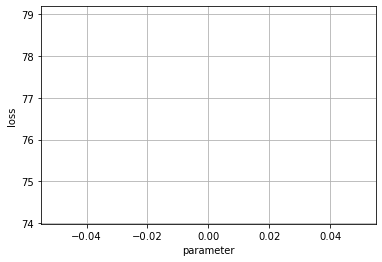

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X,y=df.drop(['Sales'],axis=1),df['Sales']
avg=[]
lr = XGBRegressor(objective='reg:squarederror', learning_rate=0.25, min_child_weight=8, 
                          reg_lambda=2, subsample=.6)
for j in range(11):
    print('Starting j: {}'.format(j))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    dum=[]
    bum=[]
    for i in range(1):
        i=i
        lr.fit(X_train, y_train)
        y_test_pred = lr.predict(X_test)
        y_test_pred = [abs(number) for number in y_test_pred]
        loss=mean_squared_log_error(y_test, y_test_pred)
        print('For i: {} the loss is {}'.format(i,loss*1000))
        bum.append(i)
        dum.append(loss*1000)
        plt.plot(bum,dum)
        avg.append(mean(dum))
plt.ylabel('loss')
plt.xlabel('parameter');
plt.grid(True)
print(avg)
print(mean(avg))

In [11]:
lr #Printing model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

{'Store_Type': 315, 'Discount': 680, 'Location_Type': 287, 'dayofweek': 1151, 'Holiday': 450, 'Store_id': 2276, 'Region_Code': 268, 'year': 498}


([<matplotlib.axis.XTick at 0x2761199eb08>,
 [Text(0, 0, 'Store_Type'),
  Text(0, 0, 'Discount'),
  Text(0, 0, 'Location_Type'),
  Text(0, 0, 'dayofweek'),
  Text(0, 0, 'Holiday'),
  Text(0, 0, 'Store_id'),
  Text(0, 0, 'Region_Code'),
  Text(0, 0, 'year')])

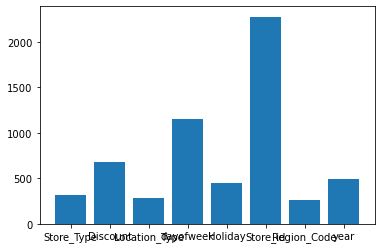

In [12]:
#Getting the feature importence chart
D=lr.get_booster().get_fscore()
print(lr.get_booster().get_fscore())
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

## Final Model

In [13]:
# split into input and output elements
X,y=df.drop(['Sales'],axis=1),df['Sales']

#Final model initiation
final_lr = XGBRegressor(objective='reg:squarederror', learning_rate=0.25, min_child_weight=8, reg_lambda=2, subsample=.6)

#Fitting the model
final_lr.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=6,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

# To Csv

In [241]:
df_test['year'] = df_test['year'].map({2018: 0, 2019: 1})#Encoding the year in test dataset

In [253]:
#Getting final predictions
y_test_pred = final_lr.predict(df_test)
y_test_pred

array([55416.3  , 39338.55 , 77768.4  , ..., 46083.11 , 30609.332,
       25053.686], dtype=float32)

In [254]:
y_test_pred.min()

7008.259

In [255]:
df_sub = pd.DataFrame(y_test_pred)
  
# save the dataframe as a csv file
df_sub.to_csv("submit.csv")